In [3]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import math

In [3]:
root_Dir= r"D:\ShareCache\2019000051_袁帅\manusicrpt_2\OCVD_data.csv"
df = pd.read_csv(root_Dir,header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.001000,0.0054,-0.1001,0.0054,-2.001,0.0108,-0.001000,-0.000100,-0.1001,-0.04752,-2.001,-0.04886
1,-0.001000,0.0059,-0.1000,0.0061,-2.000,0.0066,-0.001000,0.000900,-0.1000,-0.04572,-2.000,-0.05066
2,-0.000999,0.0056,-0.0999,0.0071,-1.999,0.0074,-0.000999,-0.000599,-0.0999,-0.04682,-1.999,-0.04766
3,-0.000998,0.0090,-0.0998,0.0059,-1.998,0.0064,-0.000998,0.000400,-0.0998,-0.04772,-1.998,-0.04726
4,-0.000997,0.0051,-0.0997,0.0069,-1.997,0.0066,-0.000997,0.000100,-0.0997,-0.04942,-1.997,-0.05146
...,...,...,...,...,...,...,...,...,...,...,...,...
19997,NaN,NaN,NaN,NaN,17.996,0.0174,NaN,NaN,NaN,NaN,17.996,--
19998,NaN,NaN,NaN,NaN,17.997,0.0166,NaN,NaN,NaN,NaN,17.997,--
19999,NaN,NaN,NaN,NaN,17.998,0.0178,NaN,NaN,NaN,NaN,17.998,--
20000,NaN,NaN,NaN,NaN,17.999,0.0180,NaN,NaN,NaN,NaN,17.999,--


<module 'matplotlib.pyplot' from 'd:\\Program Files\\Miniconda3\\envs\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

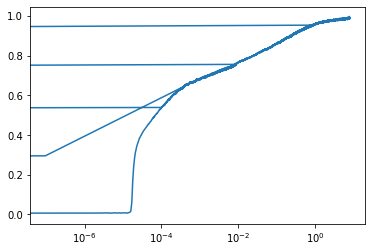

In [11]:
x0 = np.array([0])
y0 = np.array([0])
for i in range(3):
    x = df[2*i]
    x = x.dropna()
    y = df[2*i+1]
    y = y.dropna()
    x0 = np.concatenate((x0,x))
    y0 = np.concatenate((y0,y))
x0 = x0[1:30000]
y0 = y0[1:30000]
plt.semilogx(x0,y0)
plt

In [13]:
data = np.array([x0,y0])
data = np.transpose(data)
data = data[np.argsort(data[:,0])]
data.shape
np.savetxt(X=data,fname="ocvd.csv",delimiter=",",fmt="%.10f")

In [34]:
def c3e3(x,y0,A1,t1,A2,t2,A3,t3):
    return y0 + A1*np.exp(-x/t1)+A2*np.exp(-x/t2)+A3*np.exp(-x/t3)
    
def c2e2(x,y0,A1,t1,A2,t2):
    return y0 + A1*np.exp(-x/t1)+A2*np.exp(-x/t2)
def c1e1(x,y0,A1,t1):
    return y0 + A1*np.exp(-x/t1)


In [35]:
time0 = []
for i in range(7):
    for j in range(9):
        x = (j+1)*pow(10,-i)
        time0.append(x)
time0 = np.array(time0)


<module 'matplotlib.pyplot' from 'd:\\Program Files\\Miniconda3\\envs\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

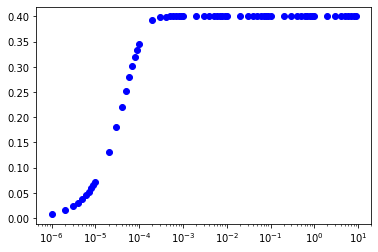

In [41]:
controly = c1e1(time0,0.4,-0.4,5E-5,)
plt.semilogx(time0,controly,'bo')
plt